In [ ]:
# England

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [4]:
total_full = pd.read_csv("Total_Full.csv").drop(["Unnamed: 0","Hazardous/Non-hazardous split","Year.1","EWC-STAT code.1","EWC-STAT code.1","EWC-STAT description.1","Hazardous/Non-hazardous split.1"], axis=1)
                                                 

In [5]:
total_full

,Year,EWC-STAT code,EWC-STAT description,A,B,C10-C12,C13-C15,C16,C17_C18,C19,C20-C22,C23,C24_C25,C26-C30,C31-C33,D,E36_E37_E39,F,G-U_X_G4677,EP_HH,Total waste generation,Energy recovery,Incineration,Recovery other than energy recovery - Except backfilling,Recovery other than energy recovery - Backfilling,Deposit onto or into land,Land treatment and release into water bodies,Total waste sent to final treatment
0,2010,01.1,Spent solvents,0.000000,0.000000e+00,1.369786e+01,9.133929,16.319214,693.591932,18.387391,3.926206e+04,9.554549,338.426256,355.766317,82.014550,2.012466e+00,0.451289,0.000000e+00,1.046579e+03,0.000000e+00,4.184799e+04,0.00,0.000,8.436487e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.436487e+03
1,2010,01.2,"Acid, alkaline or saline wastes",0.000000,0.000000e+00,5.387579e+03,3.314856,28.716047,11948.970013,2342.106951,8.160362e+04,4225.370620,35294.610566,7608.876714,1734.271097,5.428581e+01,226.938253,0.000000e+00,1.425048e+04,0.000000e+00,1.647091e+05,0.00,0.000,8.934690e+02,0.000000e+00,7.376187e+04,0.000000e+00,7.465534e+04
2,2010,01.3,Used oils,21570.796028,1.442000e+03,3.709417e+03,47.053809,53.668114,2362.477046,3690.560477,3.170781e+04,12047.557542,14252.562016,5759.976404,2483.931555,1.962822e+04,17.354620,0.000000e+00,4.682991e+04,6.258113e+03,1.718614e+05,0.00,0.000,1.472031e+03,0.000000e+00,2.390990e+02,1.517669e+03,3.228799e+03
3,2010,"01.4, 02, 03.1",Chemical wastes,103009.387438,7.480000e+02,5.527500e+02,2833.086749,467.704496,26199.232093,6178.540178,3.423417e+05,3615.674035,70664.160485,8812.291686,2052.422418,8.519561e+02,10.074780,0.000000e+00,7.443103e+04,3.833570e+03,6.466016e+05,0.00,5722.000,7.643070e+04,0.000000e+00,4.148264e+04,7.480000e+02,1.243833e+05
4,2010,03.2,Industrial effluent sludges,0.000000,1.653480e+03,4.977595e+04,1883.063196,15.307745,59493.634879,996.734145,2.226714e+04,6366.728175,18293.536241,2211.400829,153.526622,4.871779e+03,8904.147212,0.000000e+00,8.542826e+03,0.000000e+00,1.854293e+05,0.00,127039.000,4.431872e+02,0.000000e+00,6.222550e+04,1.653480e+03,1.913612e+05
5,2010,03.3,Sludges & liquid wastes from waste treatment,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,111552.00,1157.000,0.000000e+00,0.000000e+00,3.333370e+05,0.000000e+00,4.460460e+05
6,2010,05,Health care & biological wastes,1021.428254,2.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.468283e+05,0.000000e+00,2.478517e+05,0.00,120146.000,4.011550e+02,0.000000e+00,9.108154e+04,2.000000e+00,2.116307e+05
7,2010,06.1,"Metallic wastes, ferrous",0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1434.640000,158369.188000,0.000000,0.000000,0.000000e+00,0.000000,1.386052e+06,1.441228e+06,1.151046e+04,2.998594e+06,0.00,0.000,8.471006e+06,0.000000e+00,2.007080e+03,0.000000e+00,8.473013e+06
8,2010,06.2,"Metallic wastes, non-ferrous",0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,25829.889000,0.000000,0.000000,0.000000e+00,0.000000,1.385113e+05,1.521354e+05,2.089910e+03,3.185665e+05,0.00,0.000,1.807072e+06,0.000000e+00,1.184601e+03,0.000000e+00,1.808256e+06
9,2010,06.3,"Metallic wastes, mixed",954.036854,4.748000e+03,1.955391e+02,23.147801,34.975924,264.325174,48.767024,4.327451e+02,66.752849,4234.320992,3141.181502,305.337026,1.766807e+02,5.023094,8.376155e+05,2.334167e+06,3.131843e+05,3.499597e+06,0.00,0.000,4.627014e+06,0.000000e+00,1.358260e+03,4.748000e+03,4.633120e+06


In [6]:
reshaped_location = pd.melt(total_full.drop("EWC-STAT code", axis=1), id_vars=['Year','EWC-STAT description'], value_vars=total_full.iloc[:,3:20].columns,
       var_name = "Location_Type", value_name="Weight")
#reshaped_location.to_csv("Reshaped_Location.csv", index=False)

In [7]:
reshaped_treatment = pd.melt(total_full.drop("EWC-STAT code", axis=1), id_vars=['Year','EWC-STAT description'], value_vars=total_full.iloc[:,21:-1].columns,
       var_name = "Treatment_Type", value_name="Weight")

#reshaped_treatment.to_csv("Reshaped_Treatment.csv", index=False)

In [8]:
total_waste_and_treatment_by_type = total_full[["EWC-STAT description", "Total waste generation", 
                                       "Total waste sent to final treatment"]].groupby("EWC-STAT description").sum().reset_index()
#total_waste_and_treatment_by_type.to_csv("total_waste_and_treatment_by_type.csv", index=False)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

/Users/devinmoya/anaconda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
total_full

,Year,EWC-STAT code,EWC-STAT description,A,B,C10-C12,C13-C15,C16,C17_C18,C19,C20-C22,C23,C24_C25,C26-C30,C31-C33,D,E36_E37_E39,F,G-U_X_G4677,EP_HH,Total waste generation,Energy recovery,Incineration,Recovery other than energy recovery - Except backfilling,Recovery other than energy recovery - Backfilling,Deposit onto or into land,Land treatment and release into water bodies,Total waste sent to final treatment
0,2010,01.1,Spent solvents,0.000000,0.000000e+00,1.369786e+01,9.133929,16.319214,693.591932,18.387391,3.926206e+04,9.554549,338.426256,355.766317,82.014550,2.012466e+00,0.451289,0.000000e+00,1.046579e+03,0.000000e+00,4.184799e+04,0.00,0.000,8.436487e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.436487e+03
1,2010,01.2,"Acid, alkaline or saline wastes",0.000000,0.000000e+00,5.387579e+03,3.314856,28.716047,11948.970013,2342.106951,8.160362e+04,4225.370620,35294.610566,7608.876714,1734.271097,5.428581e+01,226.938253,0.000000e+00,1.425048e+04,0.000000e+00,1.647091e+05,0.00,0.000,8.934690e+02,0.000000e+00,7.376187e+04,0.000000e+00,7.465534e+04
2,2010,01.3,Used oils,21570.796028,1.442000e+03,3.709417e+03,47.053809,53.668114,2362.477046,3690.560477,3.170781e+04,12047.557542,14252.562016,5759.976404,2483.931555,1.962822e+04,17.354620,0.000000e+00,4.682991e+04,6.258113e+03,1.718614e+05,0.00,0.000,1.472031e+03,0.000000e+00,2.390990e+02,1.517669e+03,3.228799e+03
3,2010,"01.4, 02, 03.1",Chemical wastes,103009.387438,7.480000e+02,5.527500e+02,2833.086749,467.704496,26199.232093,6178.540178,3.423417e+05,3615.674035,70664.160485,8812.291686,2052.422418,8.519561e+02,10.074780,0.000000e+00,7.443103e+04,3.833570e+03,6.466016e+05,0.00,5722.000,7.643070e+04,0.000000e+00,4.148264e+04,7.480000e+02,1.243833e+05
4,2010,03.2,Industrial effluent sludges,0.000000,1.653480e+03,4.977595e+04,1883.063196,15.307745,59493.634879,996.734145,2.226714e+04,6366.728175,18293.536241,2211.400829,153.526622,4.871779e+03,8904.147212,0.000000e+00,8.542826e+03,0.000000e+00,1.854293e+05,0.00,127039.000,4.431872e+02,0.000000e+00,6.222550e+04,1.653480e+03,1.913612e+05
5,2010,03.3,Sludges & liquid wastes from waste treatment,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,111552.00,1157.000,0.000000e+00,0.000000e+00,3.333370e+05,0.000000e+00,4.460460e+05
6,2010,05,Health care & biological wastes,1021.428254,2.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.468283e+05,0.000000e+00,2.478517e+05,0.00,120146.000,4.011550e+02,0.000000e+00,9.108154e+04,2.000000e+00,2.116307e+05
7,2010,06.1,"Metallic wastes, ferrous",0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1434.640000,158369.188000,0.000000,0.000000,0.000000e+00,0.000000,1.386052e+06,1.441228e+06,1.151046e+04,2.998594e+06,0.00,0.000,8.471006e+06,0.000000e+00,2.007080e+03,0.000000e+00,8.473013e+06
8,2010,06.2,"Metallic wastes, non-ferrous",0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,25829.889000,0.000000,0.000000,0.000000e+00,0.000000,1.385113e+05,1.521354e+05,2.089910e+03,3.185665e+05,0.00,0.000,1.807072e+06,0.000000e+00,1.184601e+03,0.000000e+00,1.808256e+06
9,2010,06.3,"Metallic wastes, mixed",954.036854,4.748000e+03,1.955391e+02,23.147801,34.975924,264.325174,48.767024,4.327451e+02,66.752849,4234.320992,3141.181502,305.337026,1.766807e+02,5.023094,8.376155e+05,2.334167e+06,3.131843e+05,3.499597e+06,0.00,0.000,4.627014e+06,0.000000e+00,1.358260e+03,4.748000e+03,4.633120e+06


In [11]:
x = total_full.drop(["Year", "EWC-STAT code", "EWC-STAT description"], axis=1)
y = total_full["EWC-STAT code"] 

In [29]:
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
cross_val_score(rf, x , y)

/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.89393939, 0.96969697, 1.        ])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.725
4 : 0.775
5 : 0.825
8 : 0.85
10 : 0.925
20 : 0.95
50 : 0.975
75 : 0.975
100 : 0.975
250 : 0.975
500 : 1.0


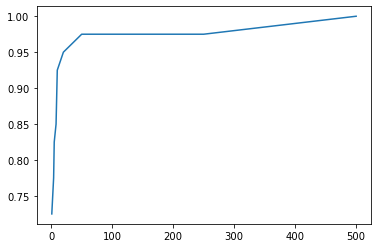

In [32]:
plt.plot(n_estimators_array, results)

In [33]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [34]:
rf = RandomForestClassifier(n_estimators=250)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
# Fit the random search model
rf_random.fit(x_train, y_train)

/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=250,
                                                    n_jobs=None,
 

In [35]:
rf_random.best_params_

{'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90}

In [36]:
forest = RandomForestClassifier(n_estimators=250, min_samples_leaf=1, max_features="log2", max_depth=20)

In [37]:
cross_val_score(forest, x , y)

/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.96969697, 1.        , 1.        ])

In [39]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

A                                                           0.034450
B                                                           0.027533
C10-C12                                                     0.041563
C13-C15                                                     0.027726
C16                                                         0.029745
C17_C18                                                     0.036269
C19                                                         0.036015
C20-C22                                                     0.027855
C23                                                         0.030632
C24_C25                                                     0.046572
C26-C30                                                     0.037874
C31-C33                                                     0.030503
D                                                           0.035864
E36_E37_E39                                                 0.030069
F                                 

In [41]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

Deposit onto or into land                                   0.077240
Total waste generation                                      0.072797
Total waste sent to final treatment                         0.068638
Recovery other than energy recovery - Except backfilling    0.068502
G-U_X_G4677                                                 0.062294
EP_HH                                                       0.057322
C24_C25                                                     0.046572
C10-C12                                                     0.041563
C26-C30                                                     0.037874
C17_C18                                                     0.036269
C19                                                         0.036015
D                                                           0.035864
A                                                           0.034450
Recovery other than energy recovery - Backfilling           0.032600
F                                 

<AxesSubplot:>

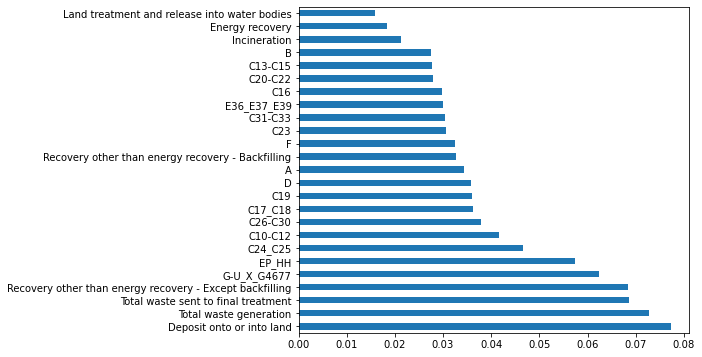

In [42]:
feature_importances.plot(kind='barh', figsize=(7,6))

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [16]:
models = [("LogR", LogisticRegression()), ("KNN", KNeighborsClassifier()), ('NB', GaussianNB())]

In [17]:
for model in models:
    results = cross_val_score(model[1],x,y, cv=3)
    print(model[0],":", results, np.mean(results))

LogR : [0.65151515 0.93939394 0.81818182] 0.8030303030303031
KNN : [0.45454545 0.87878788 0.81818182] 0.7171717171717171
NB : [0.78787879 0.93939394 0.75757576] 0.8282828282828283


/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureW